<a href="https://colab.research.google.com/github/zavarujs/skripsi-FC-25/blob/main/k_means_tok_skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/male_players.csv')
df.head()

<ipython-input-3-462e383ac3d0>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/male_players.csv')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [ ]:
df.shape

(180021, 109)

In [ ]:
df_ea24 = df[df['fifa_version'] == 24]
df_ea24.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [ ]:
df_ea24.shape

(18350, 109)

In [ ]:
# Check for duplicate rows based on all columns
duplicate_rows_all = df_ea24[df_ea24.duplicated(keep=False)]

# Check for duplicates based on a specific column (e.g., 'player_name')
duplicate_rows_player_name = df_ea24[df_ea24.duplicated(subset=['short_name'], keep=False)]

# Print the number of duplicate rows for all columns
print("Number of duplicate rows (all columns):", len(duplicate_rows_all))

# Print the number of duplicate rows based on 'player_name'
print("Number of duplicate rows (player_name column):", len(duplicate_rows_player_name))

# Display the duplicate rows if any are found
if not duplicate_rows_all.empty:
    print("\nDuplicate Rows (all columns):")
    print(duplicate_rows_all)

if not duplicate_rows_player_name.empty:
    print("\nDuplicate Rows (player_name column):")
duplicate_rows_player_name

Number of duplicate rows (all columns): 0
Number of duplicate rows (player_name column): 1578

Duplicate Rows (player_name column):


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
7,202126,/player/202126/harry-kane/240002,24.0,2.0,2023-09-22,H. Kane,Harry Kane,ST,90,90,...,69+3,69+3,69+3,67+3,64+3,63+3,63+3,63+3,64+3,20+3
10,231866,/player/231866/rodrigo-hernandez-cascante/240002,24.0,2.0,2023-09-22,Rodri,Rodrigo Hernández Cascante,"CDM, CM",89,90,...,87+3,87+3,87+3,80+3,80+3,84+3,84+3,84+3,80+3,19+3
16,209331,/player/209331/mohamed-salah/240002,24.0,2.0,2023-09-22,M. Salah,Mohamed Salah Ghaly,RW,89,89,...,68+3,68+3,68+3,71+3,67+3,58+3,58+3,58+3,67+3,22+3
25,222665,/player/222665/martin-odegaard/240002,24.0,2.0,2023-09-22,M. Ødegaard,Martin Ødegaard,"CAM, CM",87,90,...,75+3,75+3,75+3,75+3,71+3,64+3,64+3,64+3,71+3,20+3
28,231478,/player/231478/lautaro-martinez/240002,24.0,2.0,2023-09-22,L. Martínez,Lautaro Javier Martínez,ST,87,90,...,66+3,66+3,66+3,64+3,62+3,62+3,62+3,62+3,62+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,272852,/player/272852/phijam-singh/240002,24.0,2.0,2023-09-22,P. Singh,Phijam Vikash Singh,CM,48,60,...,50+2,50+2,50+2,49+2,50+2,49+2,49+2,49+2,50+2,15+2
18330,272822,/player/272822/junfeng-li/240002,24.0,2.0,2023-09-22,Li Junfeng,李俊枫,CM,48,53,...,46+2,46+2,46+2,46+2,46+2,43+2,43+2,43+2,46+2,13+2
18335,259731,/player/259731/vikram-singh/240002,24.0,2.0,2023-09-22,V. Singh,Vikram Lahkbir Singh,GK,48,49,...,20+2,20+2,20+2,16+2,16+2,18+2,18+2,18+2,16+2,47+2
18341,275847,/player/275847/khoirom-singh/240002,24.0,2.0,2023-09-22,K. Singh,Khoirom Singh,GK,47,61,...,19+2,19+2,19+2,17+2,17+2,19+2,19+2,19+2,17+2,46+2


In [ ]:
df_ea24.describe().columns # variabel numeric

Index(['player_id', 'fifa_version', 'fifa_update', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'league_id', 'league_level', 'club_jersey_number',
       'club_contract_valid_until_year', 'nationality_id', 'nation_team_id',
       'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_intercept

In [ ]:
df_ea24 = df_ea24 [['short_name','overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'league_id', 'league_level', 'club_jersey_number',
       'club_contract_valid_until_year', 'nationality_id', 'nation_team_id',
       'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']] # membuat dataframe baru

In [ ]:
df_ea24.head()

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,...,88.0,26,34,32,13,5,7,11,6,NaN
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,...,87.0,38,47,29,7,14,13,11,7,NaN
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,...,88.0,66,70,53,15,13,5,10,13,NaN
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,...,96.0,20,35,24,6,11,15,14,8,NaN
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,...,90.0,43,24,18,13,11,5,5,7,NaN


In [ ]:
df_ea24 = df_ea24[df_ea24.overall > 86]
df_ea24

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,...,88.0,26,34,32,13,5,7,11,6,NaN
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,...,87.0,38,47,29,7,14,13,11,7,NaN
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,...,88.0,66,70,53,15,13,5,10,13,NaN
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,...,96.0,20,35,24,6,11,15,14,8,NaN
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,...,90.0,43,24,18,13,11,5,5,7,NaN
5,R. Lewandowski,90,90,58000000.0,340000.0,34,185,81,241.0,53.0,...,88.0,35,42,19,15,6,12,8,10,NaN
6,T. Courtois,90,90,63000000.0,250000.0,31,199,96,243.0,53.0,...,66.0,20,18,16,85,89,76,90,93,46.0
7,H. Kane,90,90,119500000.0,170000.0,29,188,85,21.0,19.0,...,92.0,46,46,38,8,10,11,14,11,NaN
8,Vini Jr.,89,94,158500000.0,310000.0,22,176,73,243.0,53.0,...,79.0,32,25,18,5,7,7,7,10,NaN
9,Alisson,89,90,77500000.0,180000.0,30,193,91,9.0,13.0,...,66.0,15,19,16,86,85,85,90,89,56.0


In [ ]:
pd.set_option('display.max_rows', 70)
df_ea24.isnull().sum()

,0
short_name,0
overall,0
potential,0
value_eur,0
wage_eur,0
age,0
height_cm,0
weight_kg,0
club_team_id,0
league_id,0


In [ ]:
# Fill missing values in numeric columns only
for column in df_ea24.select_dtypes(include=['number']):
    df_ea24[column] = df_ea24[column].fillna(df_ea24[column].mean())

In [ ]:
df_ea24.isnull().sum()

,0
short_name,0
overall,0
potential,0
value_eur,0
wage_eur,0
age,0
height_cm,0
weight_kg,0
club_team_id,0
league_id,0


In [ ]:
names = df_ea24.short_name.tolist() # memilih setiap nama player untuk di gunakan nanti

df_ea24 = df_ea24.drop(['short_name'], axis = 1) # hapus short_name dari data frame

In [ ]:
df_ea24.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,...,88.0,26,34,32,13,5,7,11,6,50.555556
1,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,...,87.0,38,47,29,7,14,13,11,7,50.555556
2,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,...,88.0,66,70,53,15,13,5,10,13,50.555556
3,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,...,96.0,20,35,24,6,11,15,14,8,50.555556
4,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,...,90.0,43,24,18,13,11,5,5,7,50.555556


In [ ]:
from sklearn import preprocessing

x = df_ea24.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA untuk visual plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [ ]:
from sklearn.cluster import KMeans

# tentukan jumlah cluster
kmeans = KMeans(n_clusters=5) # 5 cluster cuk wakeh men
# ngopo kok dadak 5 cluster yo mergo iki kan data set pemain
# pasti due 5 posisi pasti : forward, midfield, defender, winger, goalkepeer. ngeten cok

# sesuai dengan data masukan
kmeans = kmeans.fit(reduced)

# mendapatkan cluster labels
labels = kmeans.predict(reduced)

# centroid values, nggo nemukke centroid
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist() # range 0-4 cluster (1-5 cluster)

In [ ]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name'] # x dan y itu untuk reduksi PCAne jadi di kurangi dadi 2 dimensi
# yaitu x dan y ben visual neng 2 rung demensi
reduced.head()

,x,y,cluster,name
0,-1.421366,-1.133696,4,K. Mbappé
1,-0.949864,-0.272452,2,E. Haaland
2,-1.416679,-0.232645,2,K. De Bruyne
3,-1.196616,-1.419112,4,L. Messi
4,-1.073323,-0.855439,4,K. Benzema


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

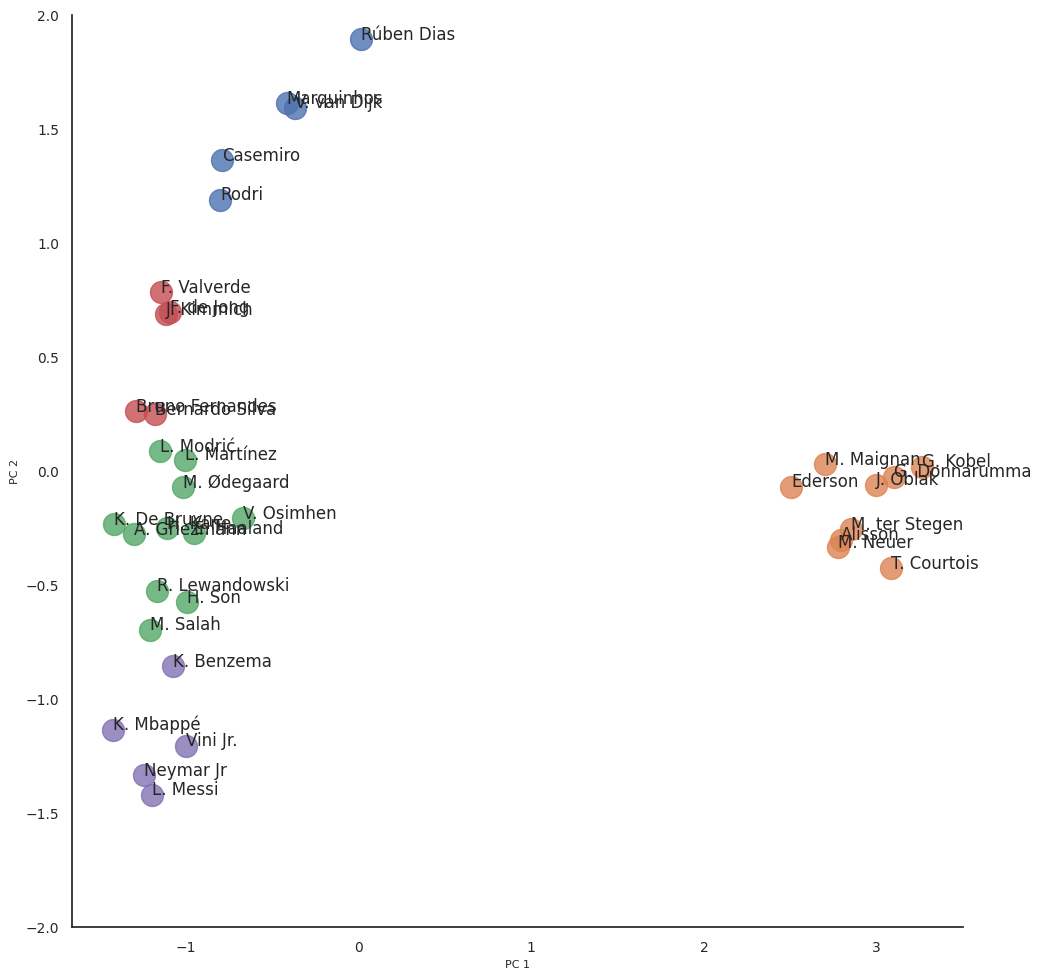

In [ ]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
               fit_reg=False, height = 10, aspect = 1, # nentukke tinggi dan aspek rasio plot
               scatter_kws={"s": 250})

# hue = cluster : dinggo varibel sg nentukke werno nggo masing2 cluster, warna e default seko fungsi sns.implot()
# data = reduced : digunakkke sumber data nggo visual e
# legend = False : legend ki bagian seko plot nggo nei info ttg makna2 dari elemen visual plot
# ketika diatur False dalam fugsi sns.lmplot() maka ngko ng visual ki ra perlu info tambahan yang disediakan oleh legend.
# kan visual plot wes ketok dadi ra perlu info tambahan
# fit_reg=False : nggo ngilangke regresi linear yang biasa tampil dalam plot

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s)) # iki loop jenenge gunane nggo nambahke teks di setiap titik dengan bantuan plt.text

ax.set(ylim=(-2, 2)) # set batasan sumbu d
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 8)
plt.ylabel("PC 2", fontsize = 8) # iki nggo ngatur ukuran label sumbu dan teks pada plot

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

class PlayerRecommender:
    def __init__(self, csv_path):
        # Load data
        self.df = pd.read_csv(csv_path)

        # Filter fifa version 24 dan pilih kolom yang dibutuhkan
        columns = [
            'short_name', 'overall', 'potential', 'age', 'club_team_id',
            'value_eur', 'wage_eur', 'height_cm', 'weight_kg',
            'shooting', 'attacking_finishing', 'power_shot_power',
            'attacking_volleys', 'attacking_heading_accuracy',
            'attacking_short_passing', 'power_jumping'
        ]

        self.df = self.df[self.df['fifa_version'] == 24][columns]

        # Isi missing values hanya untuk kolom numerik
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        self.df[numeric_columns] = self.df[numeric_columns].fillna(self.df[numeric_columns].mean())

        # Isi missing values untuk kolom non-numerik dengan string kosong
        non_numeric_columns = self.df.select_dtypes(exclude=[np.number]).columns
        self.df[non_numeric_columns] = self.df[non_numeric_columns].fillna('')

    def _calculate_player_score(self, player):
        weights = {
            'shooting': 0.2,
            'attacking_finishing': 0.2,
            'power_shot_power': 0.15,
            'attacking_volleys': 0.15,
            'attacking_heading_accuracy': 0.1,
            'attacking_short_passing': 0.1,
            'power_jumping': 0.1
        }

        # Pastikan hanya menggunakan kolom numerik untuk perhitungan
        score = player['overall'] * 0.6
        for attr, weight in weights.items():
            if attr in player.index and pd.api.types.is_numeric_dtype(player[attr]):
                score += player[attr] * weight
        return score

    def filter_players(self, min_overall=0, max_age=99, min_value=0,
                      max_wage=999999, min_height=0, max_weight=999):
        mask = ((self.df['overall'] >= min_overall) &
                (self.df['age'] <= max_age) &
                (self.df['value_eur'] >= min_value) &
                (self.df['wage_eur'] <= max_wage) &
                (self.df['height_cm'] >= min_height) &
                (self.df['weight_kg'] <= max_weight))

        filtered = self.df[mask].copy()
        filtered['player_score'] = filtered.apply(self._calculate_player_score, axis=1)
        return filtered.sort_values('player_score', ascending=False)

    def recommend_similar_players(self, player_id):
        # Gunakan hanya kolom numerik untuk perhitungan similarity
        features = self.df.select_dtypes(include=[np.number]).drop(['club_team_id'], axis=1)
        features_scaled = preprocessing.MinMaxScaler().fit_transform(features)
        sim_matrix = cosine_similarity(features_scaled)

        base_score = self._calculate_player_score(self.df.iloc[player_id])
        return sorted([
            (self.df.iloc[i]['short_name'],
             base_score * 0.6 + sim_matrix[player_id][i] * 0.4,
             self._calculate_player_score(self.df.iloc[i]))
            for i in range(len(self.df)) if i != player_id
        ], key=lambda x: x[1], reverse=True)

def main():
    recommender = PlayerRecommender('/content/drive/MyDrive/SKRIPSI/male_players.csv')

    criteria = {
        'min_overall': int(input("Rating Overall Minimum (contoh: 85): ") or 0),
        'max_age': int(input("Umur Maksimum (contoh: 30): ") or 99),
        'min_value': int(input("Nilai Minimum EUR (contoh: 1000000): ") or 0),
        'max_wage': int(input("Gaji Maksimum EUR (contoh: 50000): ") or 999999),
        'min_height': int(input("Tinggi Minimum cm (contoh: 170): ") or 0),
        'max_weight': int(input("Berat Maksimum kg (contoh: 80): ") or 999)
    }

    filtered = recommender.filter_players(**criteria)
    if not filtered.empty:
        print("\nTop 5 Pemain Sesuai Kriteria:")
        print(filtered[['short_name', 'overall', 'age', 'value_eur',
                       'wage_eur', 'height_cm', 'weight_kg',
                       'player_score']].head().to_string(index=False))
    else:
        print("Tidak ada pemain yang memenuhi kriteria.")

main()

<ipython-input-23-84aede07aa99>:9: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(csv_path)


Rating Overall Minimum (contoh: 85): 86
Umur Maksimum (contoh: 30): 36
Nilai Minimum EUR (contoh: 1000000): 100000
Gaji Maksimum EUR (contoh: 50000): 150000
Tinggi Minimum cm (contoh: 170): 187
Berat Maksimum kg (contoh: 80): 85

Top 5 Pemain Sesuai Kriteria:
 short_name  overall  age   value_eur  wage_eur  height_cm  weight_kg  player_score
Rafael Leão       86   24 102500000.0  110000.0        188         81          51.6


In [ ]:
# kode sederhana dari claude

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

class PlayerRecommender:
    def __init__(self, csv_path):
        # Load dan proses data
        self.df = self._preprocess_data(csv_path)

    def _preprocess_data(self, csv_path):
        # Load data FIFA versi 24
        df_ea24 = pd.read_csv(csv_path)
        df_ea24 = df_ea24[df_ea24['fifa_version'] == 24]

        # Kolom yang akan digunakan
        columns = [
            'short_name', 'overall', 'potential', 'age', 'club_team_id',
            'value_eur', 'wage_eur', 'height_cm', 'weight_kg',
            'shooting', 'attacking_finishing', 'power_shot_power',
            'attacking_volleys', 'attacking_heading_accuracy',
            'attacking_short_passing', 'power_jumping'
        ]
        df_ea24 = df_ea24[columns]

        # Isi missing values dengan mean
        numeric_columns = df_ea24.select_dtypes(include=['number']).columns
        df_ea24[numeric_columns] = df_ea24[numeric_columns].fillna(df_ea24[numeric_columns].mean())

        return df_ea24

    def _calculate_player_score(self, player):
        technical_weights = {
            'shooting': 0.2,
            'attacking_finishing': 0.2,
            'power_shot_power': 0.15,
            'attacking_volleys': 0.15,
            'attacking_heading_accuracy': 0.1,
            'attacking_short_passing': 0.1,
            'power_jumping': 0.1
        }

        technical_score = sum(player[attr] * weight for attr, weight in technical_weights.items())
        overall_score = player['overall'] * 0.6

        return overall_score + technical_score

    def filter_players(self,
                       min_overall=0,
                       max_age=99,
                       min_value=0,
                       max_wage=999999,
                       min_height=0,
                       max_weight=999):

        filtered_df = self.df[
            (self.df['overall'] >= min_overall) &
            (self.df['age'] <= max_age) &
            (self.df['value_eur'] >= min_value) &
            (self.df['wage_eur'] <= max_wage) &
            (self.df['height_cm'] >= min_height) &
            (self.df['weight_kg'] <= max_weight)
        ]

        # Tambahkan kolom skor pemain
        filtered_df['player_score'] = filtered_df.apply(self._calculate_player_score, axis=1)

        return filtered_df.sort_values('player_score', ascending=False)

    def recommend_similar_players(self, player_id):
        # Normalisasi fitur
        features = self.df.drop('short_name', axis=1)
        scaler = preprocessing.MinMaxScaler()
        features_scaled = scaler.fit_transform(features)

        # Hitung similaritas kosinus
        similarity_matrix = cosine_similarity(features_scaled)

        player_score = self._calculate_player_score(self.df.iloc[player_id])

        recommendations = []
        for i in range(len(self.df)):
            if i != player_id:
                similarity_score = similarity_matrix[player_id][i]
                final_score = (player_score * 0.6) + (similarity_score * 0.4)
                recommendations.append((
                    self.df.iloc[i]['short_name'],
                    final_score,
                    self._calculate_player_score(self.df.iloc[i])
                ))

        return sorted(recommendations, key=lambda x: x[1], reverse=True)

def main():
    # Path file CSV (sesuaikan dengan lokasi file Anda)
    csv_path = '/content/drive/MyDrive/SKRIPSI/male_players.csv'

    recommender = PlayerRecommender(csv_path)

    # Input kriteria filter dari pengguna
    print("Masukkan kriteria filter pemain:")
    kriteria = {
        'min_overall': int(input("Rating Overall Minimum (contoh: 85): ") or 0),
        'max_age': int(input("Umur Maksimum (contoh: 30): ") or 99),
        'min_value': int(input("Nilai Minimum dalam EUR (contoh: 1000000): ") or 0),
        'max_wage': int(input("Gaji Maksimum dalam EUR (contoh: 50000): ") or 999999),
        'min_height': int(input("Tinggi Minimum dalam cm (contoh: 170): ") or 0),
        'max_weight': int(input("Berat Maksimum dalam kg (contoh: 80): ") or 999)
    }

    # Filter dan tampilkan pemain
    filtered_players = recommender.filter_players(**kriteria)

    if not filtered_players.empty:
        print("\nTop 5 Pemain Sesuai Kriteria:")
        print(filtered_players[
            ['short_name', 'overall', 'age', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'player_score']
        ].head().to_string(index=False))
    else:
        print("Tidak ada pemain yang memenuhi kriteria.")

if __name__ == "__main__":
    main()

In [ ]:
#KODE LAMA

# Import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/male_players.csv')

# Filter for FIFA version 24 and select relevant columns
df_ea24 = df[df['fifa_version'] == 24]
df_ea24 = df_ea24[['short_name', 'overall', 'potential', 'age', 'club_team_id',
                    'value_eur', 'wage_eur', 'height_cm', 'weight_kg',
                    'shooting', 'attacking_finishing', 'power_shot_power',
                    'attacking_volleys', 'attacking_heading_accuracy',
                    'attacking_short_passing', 'power_jumping']]

# Fill missing values with the mean of each column
for column in df_ea24.select_dtypes(include=['number']):
    df_ea24[column].fillna(df_ea24[column].mean(), inplace=True)

# Normalize the features
scaler = preprocessing.MinMaxScaler()
features = df_ea24.drop(['short_name'], axis=1)
features_scaled = scaler.fit_transform(features)

# Calculate player scores based on technical features and overall rating
def calculate_player_score(player):
    technical_score = (
        player['shooting'] * 0.2 +
        player['attacking_finishing'] * 0.2 +
        player['power_shot_power'] * 0.15 +
        player['attacking_volleys'] * 0.15 +
        player['attacking_heading_accuracy'] * 0.1 +
        player['attacking_short_passing'] * 0.1 +
        player['power_jumping'] * 0.1
    )

    overall_score = player['overall'] * 0.6
    total_score = overall_score + technical_score
    return total_score

# Calculate similarity matrix
similarity_matrix = cosine_similarity(features_scaled)

# Function to recommend players
def recommend_players(player_id, all_players, similarity_matrix):
    player_score = calculate_player_score(all_players.iloc[player_id])

    recommendations = []
    for i in range(len(all_players)):
        if i != player_id:
            similarity_score = similarity_matrix[player_id][i]
            final_score = (player_score * 0.6) + (similarity_score * 0.4)
            recommendations.append((all_players.iloc[i]['short_name'], final_score, calculate_player_score(all_players.iloc[i])))

    # Sort recommendations by final score
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations

# Function to filter players based on user-defined criteria
def filter_players(df, min_overall=0, max_age=99, min_value=0, max_wage=999999,
                  min_height=0, max_weight=999):
    filtered_df = df[
        (df['overall'] >= min_overall) &
        (df['age'] <= max_age) &
        (df['value_eur'] >= min_value) &
        (df['wage_eur'] <= max_wage) &
        (df['height_cm'] >= min_height) &
        (df['weight_kg'] <= max_weight)
    ]
    return filtered_df

# Get user input for filtering criteria
print("Enter your filtering criteria:")
min_overall = int(input("Minimum Overall Rating (e.g., 85): ") or 0)
max_age = int(input("Maximum Age (e.g., 30): ") or 99)
min_value = int(input("Minimum Value in EUR (e.g., 1000000): ") or 0)
max_wage = int(input("Maximum Wage in EUR (e.g., 50000): ") or 999999)
min_height = int(input("Minimum Height in cm (e.g., 170): ") or 0)
max_weight = int(input("Maximum Weight in kg (e.g., 80): ") or 999)

# Filter players based on user input
filtered_players = filter_players(df_ea24, min_overall, max_age, min_value, max_wage, min_height, max_weight)

# Display the filtered players with their scores
if not filtered_players.empty:
    print("\nTop 5 Filtered Players:")
    filtered_players.loc[:, 'player_score'] = filtered_players.apply(calculate_player_score, axis=1)

    # Format the output for better readability
    output = filtered_players[['short_name', 'overall', 'age', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'player_score']].head(5)
    print(output.to_string(index=False))  # Display without index for cleaner output
else:
    print("No players found matching the criteria.")

Skor pemain adalah metrik yang dihitung berdasarkan berbagai atribut yang relevan dari pemain, seperti kemampuan teknis, performa, dan statistik lainnya. Dalam konteks sepak bola, skor ini sangat penting karena membantu dalam:

1. Evaluasi Kemampuan: Skor pemain memberikan gambaran yang lebih holistik tentang kemampuan seorang pemain dibandingkan dengan hanya melihat rating keseluruhan. Meskipun rating keseluruhan memberikan indikasi umum, skor yang lebih terperinci dapat mengungkapkan kekuatan dan kelemahan spesifik yang mungkin tidak terlihat pada rating tunggal.

2. Perbandingan Antara Pemain: Dengan memiliki skor yang dihitung secara konsisten, Anda dapat dengan mudah membandingkan pemain dari posisi yang berbeda atau bahkan dalam liga yang berbeda. Misalnya, meskipun V. Osimhen dan J. Kimmich memiliki rating keseluruhan yang sama (88), skor pemain mereka yang berbeda (138,75 vs. 127,05) menunjukkan bahwa Osimhen memiliki performa yang lebih baik dalam konteks atribut yang dinilai.

3. Pengambilan Keputusan dalam Transfer: Klub sepak bola sering kali menggunakan data analitik untuk memutuskan pemain mana yang akan dibeli atau dijual. Skor pemain yang tinggi menunjukkan bahwa pemain tersebut memiliki potensi yang lebih besar untuk memberikan kontribusi positif bagi tim. Misalnya, L. Martínez dengan skor 139,20 menunjukkan bahwa ia adalah pilihan yang sangat berharga, mungkin lebih dari pemain lain dengan rating keseluruhan yang sama.

Analisis Skor Pemain dalam Output
Mari kita analisis skor pemain dari output yang Anda berikan:

1. V. Osimhen (Skor: 138,75): Dengan skor ini, Osimhen menunjukkan bahwa ia memiliki kemampuan yang sangat baik dalam aspek-aspek teknis dan taktis. Sebagai seorang penyerang, kemampuannya dalam mencetak gol, kecepatan, dan keterampilan dribbling mungkin sangat tinggi, menjadikannya salah satu pemain yang paling diinginkan.

2. J. Kimmich (Skor: 127,05): Kimmich adalah gelandang serba bisa yang terkenal dengan kemampuan passing dan visinya. Meskipun memiliki rating yang sama dengan Osimhen, skor yang lebih rendah menunjukkan bahwa ada aspek tertentu dari permainannya yang mungkin tidak seefisien atau seefektif Osimhen dalam konteks yang diukur.

3. L. Martínez (Skor: 139,20): Skor tertinggi di antara semua pemain yang ditampilkan menunjukkan bahwa Martínez memiliki kombinasi yang sangat baik dari atribut yang diukur. Ini bisa berarti bahwa ia unggul dalam berbagai aspek permainan, seperti finishing, dribbling, dan kemampuan bertahan, membuatnya sangat berharga bagi tim.

4. Marquinhos (Skor: 116,30): Sebagai bek, Marquinhos mungkin memiliki atribut defensif yang kuat, tetapi skor yang lebih rendah menunjukkan bahwa ada ruang untuk perbaikan dalam aspek menyerang atau keterampilan teknis lainnya. Ini penting untuk dipertimbangkan saat mengevaluasi kontribusinya terhadap tim.

5. J. Musiala (Skor: 123,45): Musiala, yang masih muda, menunjukkan potensi besar dengan skor yang cukup baik. Ini menunjukkan bahwa meskipun ia masih dalam tahap pengembangan, ia sudah memiliki kemampuan yang menjanjikan, dan dapat menjadi salah satu pemain kunci di masa depan.

Kesimpulan
Skor pemain bukan hanya angka; ia mencerminkan kemampuan, potensi, dan kontribusi yang dapat diberikan seorang pemain kepada tim. Dalam analisis data sepak bola modern, pemahaman yang mendalam tentang skor ini dapat membantu pelatih, manajer, dan penggemar untuk membuat keputusan yang lebih baik mengenai pemain, baik dalam hal strategi permainan maupun dalam transaksi pasar transfer.